# Term Doc Embeddings

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
import numpy as np

In [2]:
TNG_train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))

In [33]:
#cv = CountVectorizer(ngram_range=[1,2], max_df=1.0, min_df=100, max_features=None, stop_words=None)
cv = TfidfVectorizer(ngram_range=[1,2], max_df=1.0, min_df=100, max_features=None, stop_words=None)

In [34]:
TNG_cv = cv.fit_transform(TNG_train.data)

In [35]:
#Tamaño del vocabulario
print(f'El tamaño del vocabulario es {len(cv.get_feature_names())}')

El tamaño del vocabulario es 2575


In [36]:
red = TruncatedSVD(n_components=300)
TNG_cv_red = red.fit_transform(TNG_cv.T)

# Test de similitud

In [37]:
from sklearn.neighbors import NearestNeighbors

In [38]:
neigh = NearestNeighbors(n_neighbors=20, metric="cosine")

In [39]:
neigh.fit(TNG_cv_red)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [40]:
idx_1 = cv.vocabulary_["new york"]
_, neig = neigh.kneighbors(TNG_cv_red[idx_1:idx_1+1])

In [41]:
for n in neig[0]:
    print(cv.get_feature_names()[n])

new york
york
new
washington
the new
chicago
boston
toronto
east
west
california
san
city
st
texas
division
lost
ny
national
blue


# Test de analogías??

In [18]:
idx_1 = cv.vocabulary_["man"]
idx_2 = cv.vocabulary_["doctor"]
idx_3 = cv.vocabulary_["woman"]

In [19]:
vector = TNG_cv_red[idx_2]-TNG_cv_red[idx_1]+TNG_cv_red[idx_3]

In [20]:
_, neig = neigh.kneighbors([vector])

In [21]:
for n in neig[0]:
    print(cv.get_feature_names()[n])

she
doctor
woman
going on
happened
everything
was in
didn
me and
went
seemed
started
they had
brought
they would
somehow
her
in our
maybe
there were


# TSNE

In [42]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,metric="cosine").fit_transform(TNG_cv_red)
X_embedded.shape


(2575, 2)

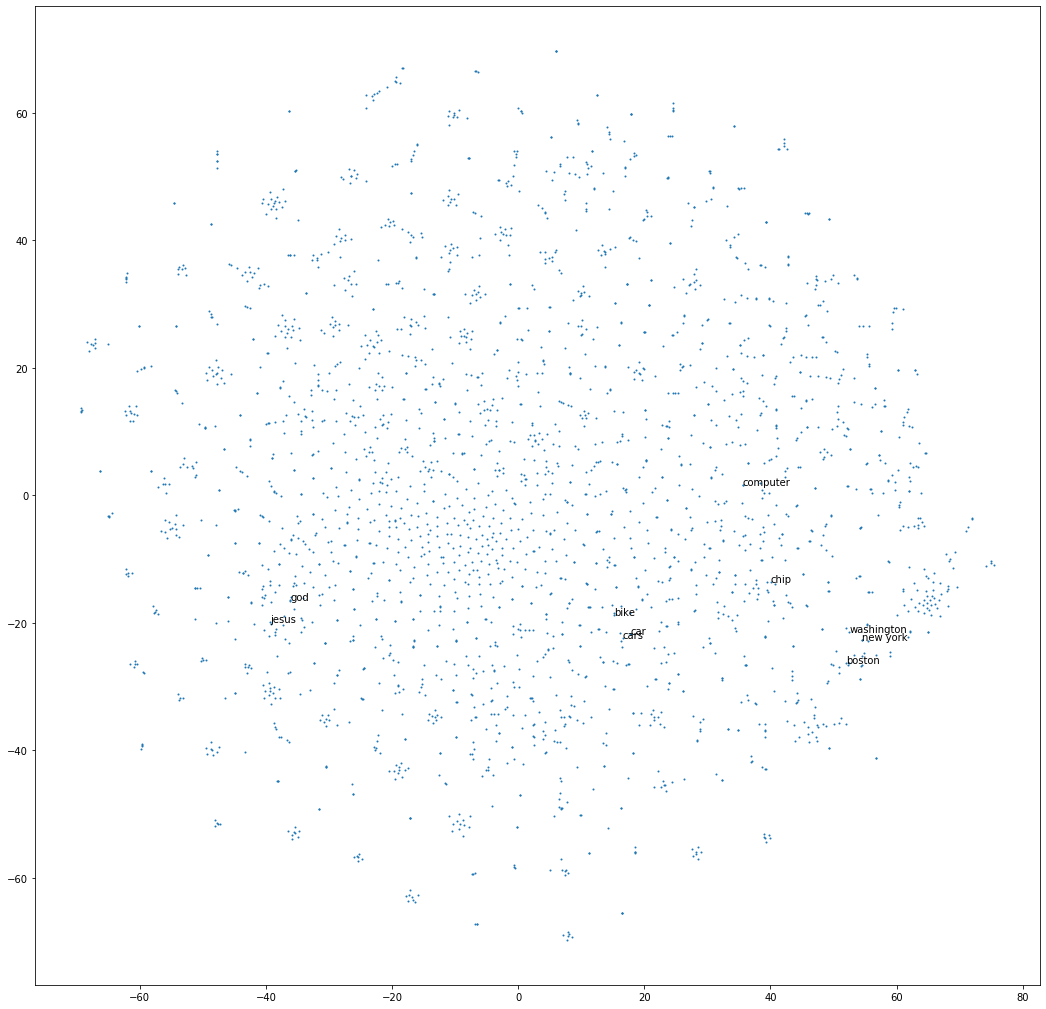

In [48]:
from matplotlib import pyplot as plt
plt.figure(figsize=[18,18])
plt.scatter(X_embedded[:,0],X_embedded[:,1], s=1)
words=["car","cars","chip","computer", "god", "jesus", "boston","washington", "new york", "bike"]
for word in words:
    idx = cv.vocabulary_[word]
    plt.text(X_embedded[idx,0],X_embedded[idx,1],word)